In [ ]:
sudo pip install -r requirements.txt

In [ ]:
#下面程式參考來源：
#1、https://www.kaggle.com/hamzaben/employee-churn-model-w-strategic-retention-plan
#2、https://github.com/zihengh1/DM2020
#=================================================================================================

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
from chart_studio import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

In [154]:
print(os.listdir("./fold"))

['DM_Tutorial1.ipynb', 'DM_Tutorial2.ipynb', 'EmployeeAttrition.csv', 'fold_0_test.csv', 'fold_0_train.csv', 'fold_1_test.csv', 'fold_1_train.csv', 'fold_2_test.csv', 'fold_2_train.csv', 'fold_3_test.csv', 'fold_3_train.csv', 'fold_4_test.csv', 'fold_4_train.csv']


In [163]:
df_sourcefile = pd.read_csv('./fold/EmployeeAttrition.csv')
df_sourcefile = df_sourcefile.drop([df_sourcefile.columns[0]],axis=1)
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 27)


In [164]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

In [165]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [128]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2


In [129]:
# let's break down the columns by their type (i.e. int64, float64, object)
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus'],
       dtype='object')}

In [130]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [131]:
df_HR.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


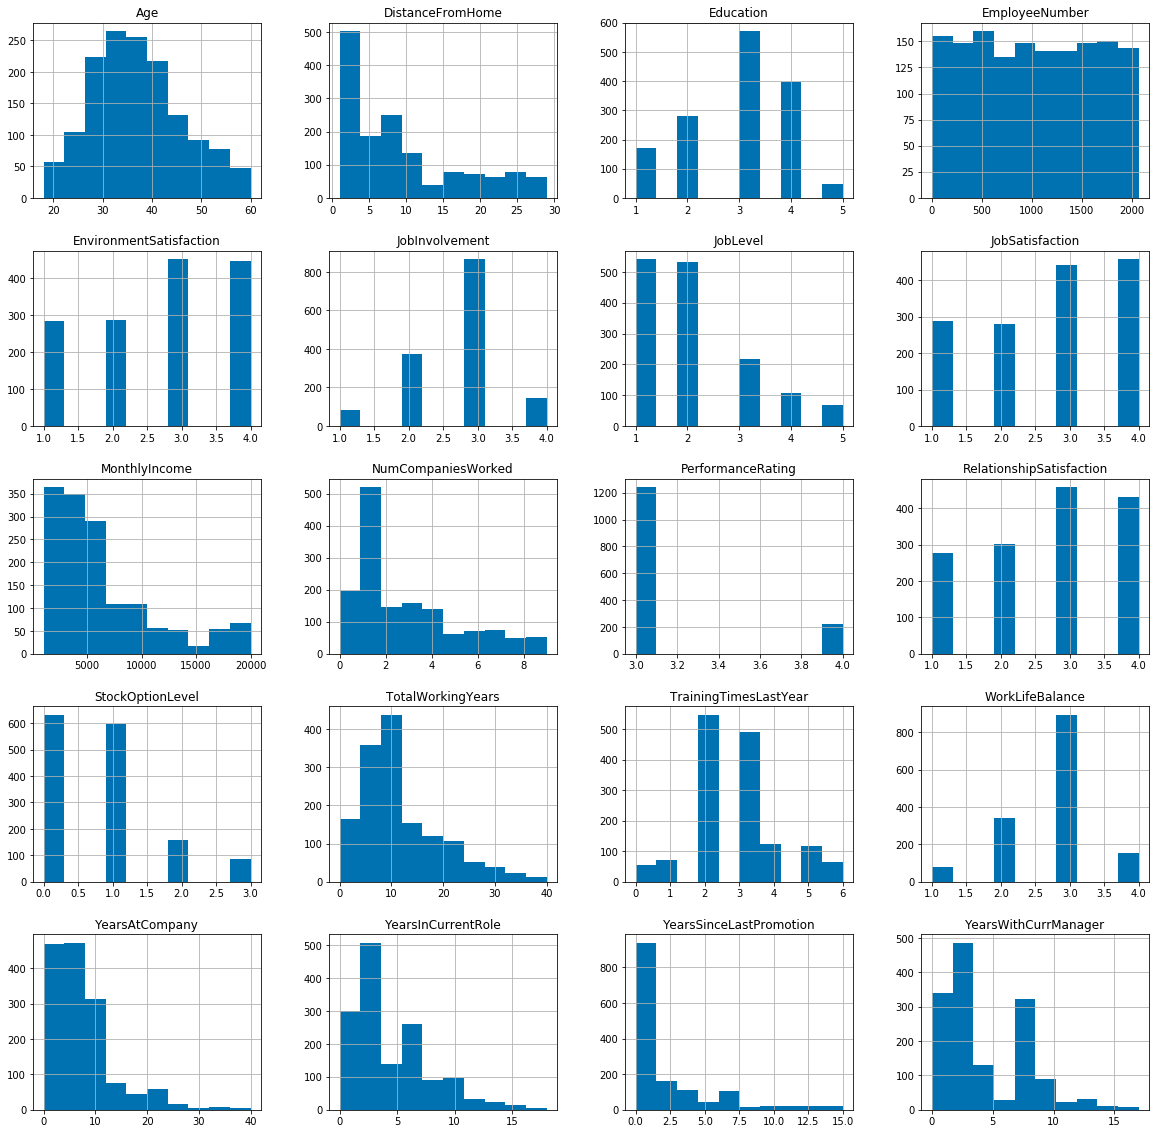

In [132]:
df_HR.hist(figsize=(20,20))
plt.show()

In [133]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


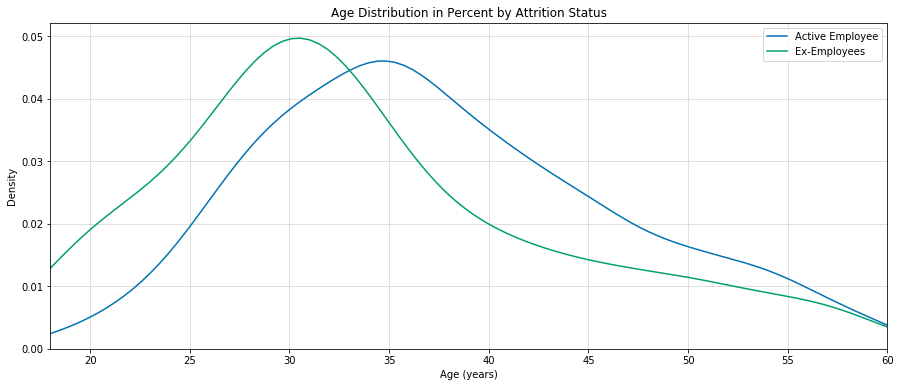

In [134]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

In [16]:
# Education Field of employees
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

In [18]:
# Gender of employees
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [19]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR[(df_HR['Attrition'] == 'Yes') & (
    df_HR['Gender'] == 'Male')].shape[0] / df_HR[df_HR['Gender'] == 'Male'].shape[0])*100, (df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['Gender'] == 'Female')].shape[0] / df_HR[df_HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


In [20]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_HR['Gender'].unique()):
    ratio = df_HR[(df_HR['Gender']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')

In [21]:
# Marital Status of employees
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.iplot(kind='bar',title='Leavers by Marital Status (%)')

In [23]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [24]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


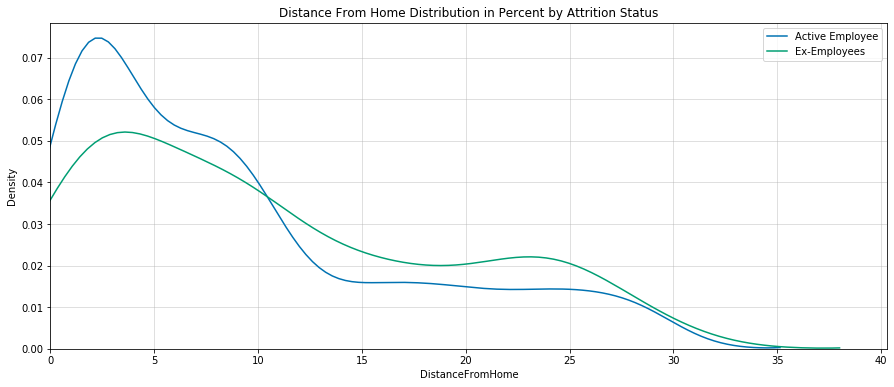

In [25]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

In [26]:
# The organisation consists of several departments
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [27]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.iplot(kind='bar',title='Leavers by Department (%)')

In [28]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [29]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.iplot(kind='bar',title='Leavers by Business Travel (%)')

In [30]:
# Employees in the database have several roles on-file
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [31]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

In [32]:
df_HR['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [33]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_HR['JobLevel'].unique()):
    ratio = df_HR[(df_HR['JobLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.iplot(kind='bar',title='Leavers by Job Level (%)')

In [34]:
df_HR['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [35]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio = df_HR[(df_HR['JobInvolvement']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.iplot(kind='bar',title='Leavers by Job Involvement (%)')

In [36]:
print("Number of training times last year varies from {} to {} years.".format(
    df_HR['TrainingTimesLastYear'].min(), df_HR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


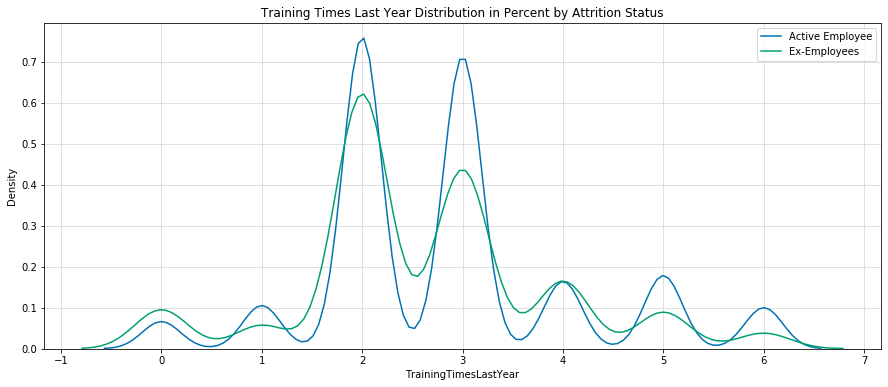

In [37]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

In [38]:
df_HR['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [39]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_HR['NumCompaniesWorked'].unique()):
    ratio = df_HR[(df_HR['NumCompaniesWorked']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.iplot(kind='bar',title='Leavers by Num Companies Worked (%)')

In [40]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


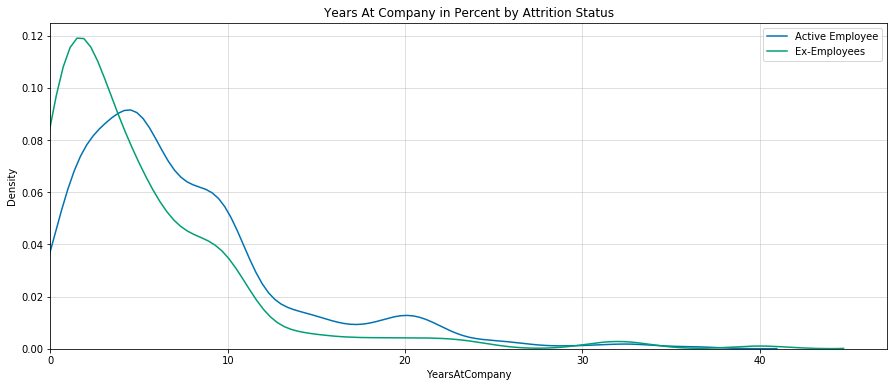

In [41]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [42]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


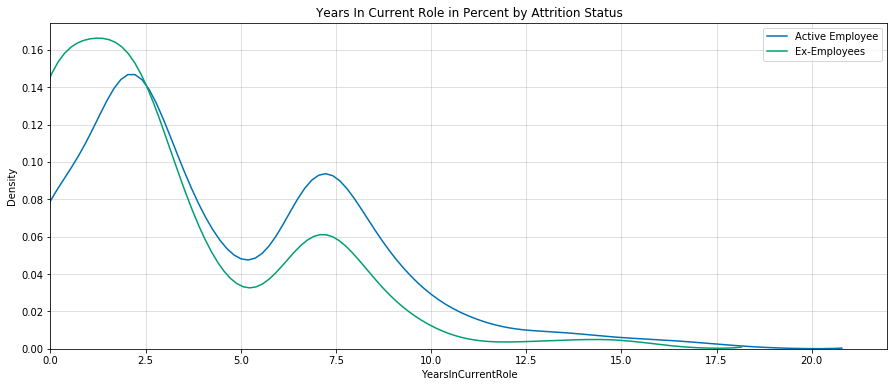

In [43]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [44]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


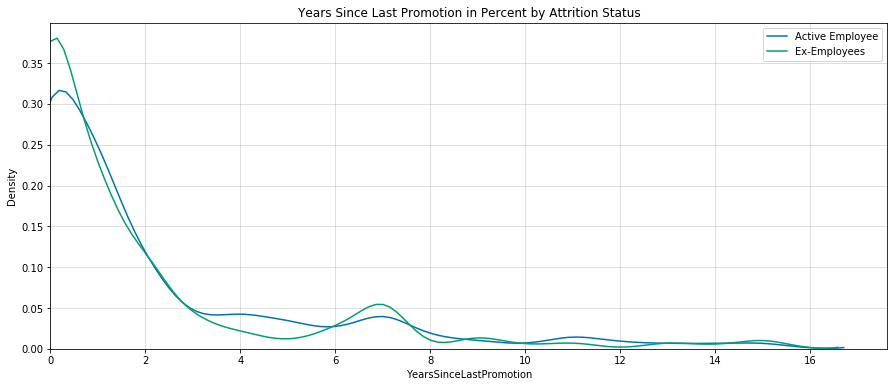

In [45]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [46]:
print("Total working years varies from {} to {} years.".format(
    df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


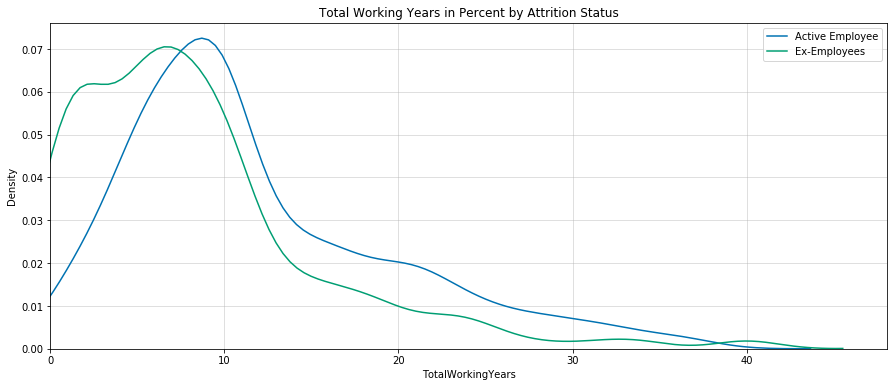

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

In [48]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


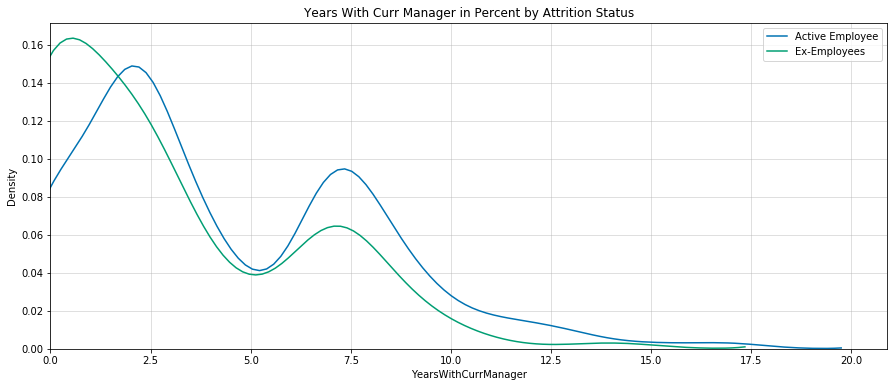

In [49]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

In [50]:
df_HR['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [51]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_HR['WorkLifeBalance'].unique()):
    ratio = df_HR[(df_HR['WorkLifeBalance']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.iplot(kind='bar',title='Leavers by WorkLifeBalance (%)')

In [52]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


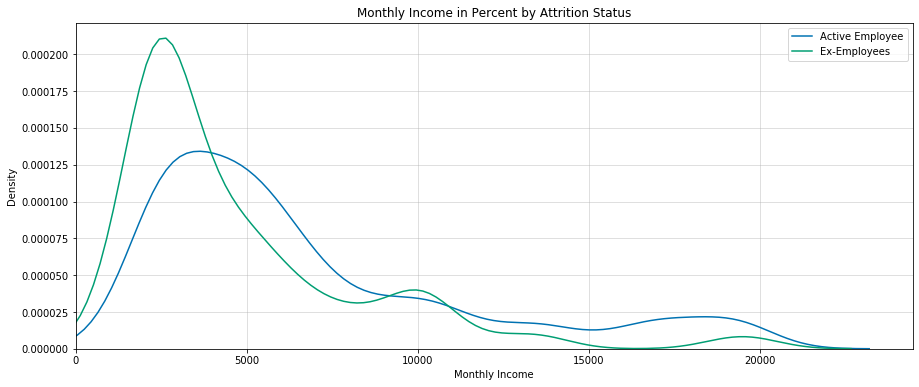

In [53]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [54]:
print("Stock Option Levels varies from {} to {}.".format(
    df_HR['StockOptionLevel'].min(), df_HR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [55]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 1)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 2)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 3)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [56]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR['StockOptionLevel'].unique()):
    ratio = df_HR[(df_HR['StockOptionLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.iplot(kind='bar',title='Leavers by Stock Option Level (%)')

In [57]:
df_HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [58]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['EnvironmentSatisfaction'].unique()):
    ratio = df_HR[(df_HR['EnvironmentSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.iplot(kind='bar',title='Leavers by Environment Satisfaction (%)')

In [59]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_HR['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [60]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['JobSatisfaction'].unique()):
    ratio = df_HR[(df_HR['JobSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.iplot(kind='bar',title='Leavers by Job Satisfaction (%)')

In [61]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [62]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['RelationshipSatisfaction'].unique()):
    ratio = df_HR[(df_HR['RelationshipSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.iplot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

In [63]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [64]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [65]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR['PerformanceRating'].unique()):
    ratio = df_HR[(df_HR['PerformanceRating']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.iplot(kind='bar',title='Leavers by Performance Rating (%)')

In [149]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In [150]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 0.0% and of Ex-employees is: 0.0%


In [151]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

In [166]:
# Find correlations with the target and sort
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition',
     'EmployeeNumber'
    ], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 Education            -0.031373
PerformanceRating     0.002889
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [ ]:
# Find correlations with the target and sort
df_HR_trans = df_HR.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition',
     'EmployeeNumber',
     #'DistanceFromHome',
     #'NumCompaniesWorked',
     #'PerformanceRating',
     #'EnvironmentSatisfaction',
     #"RelationshipSatisfaction",
     #'JobSatisfaction',
     #'StockOptionLevel',
     #'WorkLifeBalance'
    
    ], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

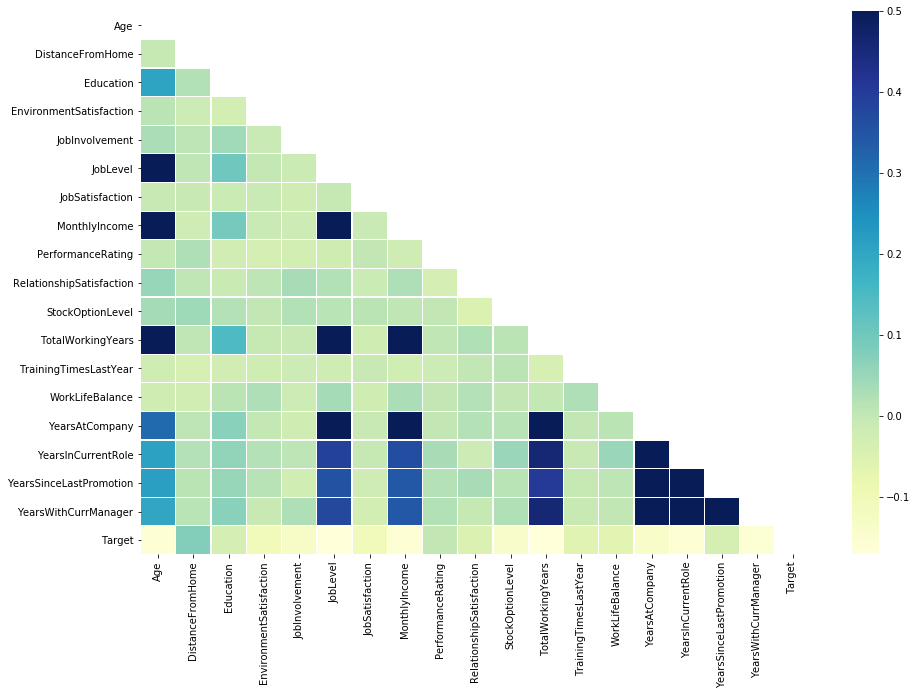

In [138]:
# Calculate correlations
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [167]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [168]:
print(df_HR.shape)
df_HR.head()

(1470, 27)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2


In [169]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [170]:
# convert rest of categorical variable into dummy
df_HR = pd.get_dummies(df_HR, drop_first=True)

In [171]:
print(df_HR.shape)
df_HR.head()

(1470, 41)


,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,0,3,2,4,5993,8,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,1,2,2,2,5130,1,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,4,1,2,1,3,2090,6,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,0,3,1,3,2909,1,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,7,1,1,3,1,2,3468,9,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [172]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,0.000000,1.25,0.000000,1.666667,0.0,3.333333,1.25,5.000000,1.312270,4.444444,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,1.250000,0.00,0.002419,3.333333,5.0,1.666667,1.25,1.666667,1.085045,0.555556,5.0,5.000000,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,0.178571,1.25,0.007257,5.000000,5.0,1.666667,0.00,3.333333,0.284623,3.333333,0.0,1.666667,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,0.357143,3.75,0.009676,5.000000,0.0,3.333333,0.00,3.333333,0.500263,0.555556,0.0,3.333333,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,0.178571,0.00,0.014514,0.000000,5.0,3.333333,0.00,1.666667,0.647446,5.000000,0.0,5.000000,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [173]:
print('Size of Full Encoded Dataset: {}'. format(df_HR.shape))

Size of Full Encoded Dataset: (1470, 41)


In [174]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df_HR['Attrition'].copy()

In [175]:
type(target)

pandas.core.series.Series

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [214]:
raw_data_train = pd.read_csv("./fold/fold_0_train.csv")
#raw_data_train = raw_data_train.drop([raw_data_train.columns[0]],axis=1)
#raw_data_train= pd.DataFrame(raw_data_train, columns = ["Age",
#                                                        'Attrition',
#                                                        'MonthlyIncome',
#                                                        'TotalWorkingYears',
#                                                        'YearsAtCompany',
#                                                        'DistanceFromHome',
#                                                        'JobSatisfaction',
#                                                        'EnvironmentSatisfaction',
#                                                        'YearsSinceLastPromotion',
#                                                        "RelationshipSatisfaction"])

raw_data_train = raw_data_train.drop([raw_data_train.columns[0],
                        #'Age',
                        #'MonthlyIncome',
                        #'YearsAtCompany',
                        'DistanceFromHome',
                        'PerformanceRating',
                   #     'RelationshipSatisfaction',
                        #'EnvironmentSatisfaction',
                        #'WorkLifeBalance',
                        #'JobInvolvement',
                        #'JobSatisfaction',
                        #'PerformanceRating',
                        #'JobLevel',
                        #'YearsSinceLastPromotion',
                        #'YearsInCurrentRole',
                        #'YearsWithCurrManager',
                        #'Education',
                                        
                        #'TotalWorkingYears',
                        'NumCompaniesWorked',
                        'EmployeeNumber'
                                      
                        #,'StockOptionLevel'
                                      
    #                    'EmployeeNumber',
    # 'DistanceFromHome',
    # 'NumCompaniesWorked',
    # 'PerformanceRating',
    # 'EnvironmentSatisfaction',
    # "RelationshipSatisfaction",
    # 'JobSatisfaction',
    # 'StockOptionLevel',
    # 'WorkLifeBalance'#
                      #                
                   # 
                                      
                                      
                        ],axis=1)

one_hot_encoding_df_train = getOne_hot_encoding_df(raw_data_train) 
    
    
raw_data_test = pd.read_csv("./fold/fold_0_test.csv")
#raw_data_test = raw_data_test.drop([raw_data_test.columns[0]],axis=1)
#raw_data_test= pd.DataFrame(raw_data_test, columns = ["Age",
#                                                        'Attrition',
#                                                        'MonthlyIncome',
#                   #                                     'TotalWorkingYears',
#                   #                                     'YearsAtCompany',
#                                                        'DistanceFromHome',
#                                                        'JobSatisfaction',
#                                                        'EnvironmentSatisfaction',
#                                                        'YearsSinceLastPromotion',
#                                                        "RelationshipSatisfaction"])
raw_data_test = raw_data_test.drop([raw_data_test.columns[0],
                        #'Age',
                        #'MonthlyIncome',
                        #'YearsAtCompany',
                        'DistanceFromHome',
                        'PerformanceRating',
               #                     'RelationshipSatisfaction',
                                        
                        #'EnvironmentSatisfaction',
                        #'WorkLifeBalance',
                        #'JobInvolvement',
                        #'JobSatisfaction',
                        #'PerformanceRating',
                        #'JobLevel',
                        #'YearsSinceLastPromotion',
                        #'YearsInCurrentRole',
                        #'YearsWithCurrManager',
                        #'Education',
                                        
                        #'TotalWorkingYears',
                        'NumCompaniesWorked',
                        'EmployeeNumber'
                        #,'StockOptionLevel'
                                    
                                    
                                    
                    
     #               'EmployeeNumber',
     #'DistanceFromHome',
     #'NumCompaniesWorked',
     #'PerformanceRating',
     #'EnvironmentSatisfaction',
     #"RelationshipSatisfaction",
     #'JobSatisfaction',
     #'StockOptionLevel',
     #'WorkLifeBalance'
                                    
                                    
                        ],axis=1)

one_hot_encoding_df_test = getOne_hot_encoding_df(raw_data_test)

X_train = one_hot_encoding_df_train.drop(['Attrition'],axis=1)
y_train = one_hot_encoding_df_train['Attrition']
X_test = one_hot_encoding_df_test.drop(['Attrition'],axis=1)
y_test = one_hot_encoding_df_test['Attrition']



##資料預處理 ：資料標準化
#PP = preprocessing.StandardScaler()
PP = preprocessing.MinMaxScaler()
#PP = preprocessing.MaxAbsScaler()
#PP = preprocessing.RobustScaler()
X_train = PP.fit_transform(X_train)
X_test = PP.fit_transform(X_test)
    
    
normalizer = Normalizer(copy=True, norm='l2').fit(X_train)
X_train =normalizer.transform(X_train)
normalizer = Normalizer(copy=True, norm='l2').fit(X_test)
X_test =normalizer.transform(X_test)



print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1176, 42)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 42)
Number transactions y_test dataset:  (294,)


In [216]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [217]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,SVM,77.25,6.72,83.85,3.88
0,Logistic Regression,77.13,5.65,71.08,4.05
1,Random Forest,75.56,7.13,86.48,2.77
5,Gaussian NB,73.32,7.34,61.74,9.30
4,Decision Tree Classifier,60.95,3.67,79.17,4.38
3,KNN,60.13,5.16,83.50,4.50


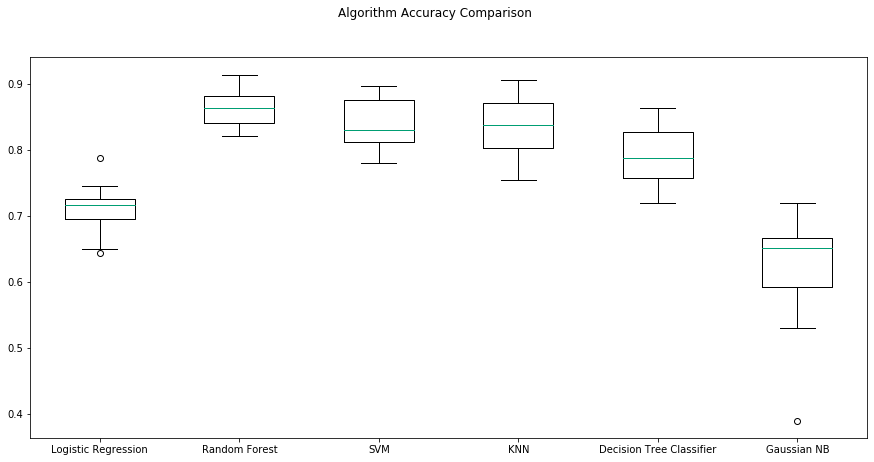

In [218]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

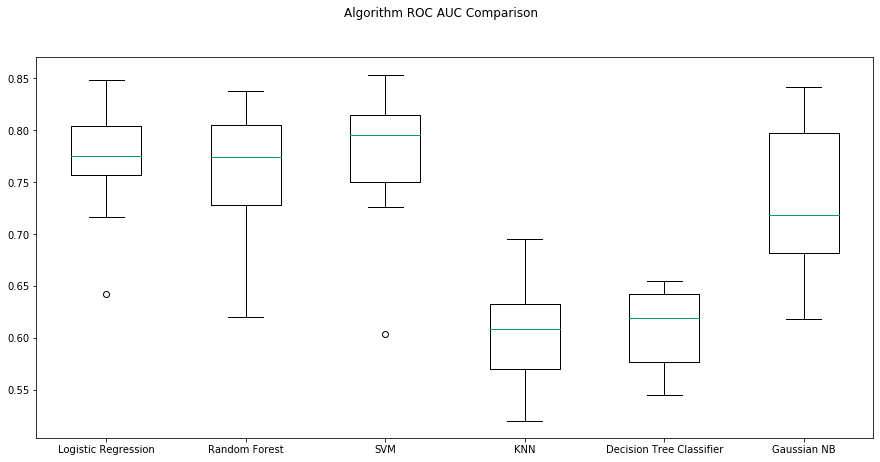

In [219]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [220]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.77 (0.06)


In [221]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.8009999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.8009999999999997}
best score: 0.7696674450357127


Text(0.5, 257.44, 'Predicted label')

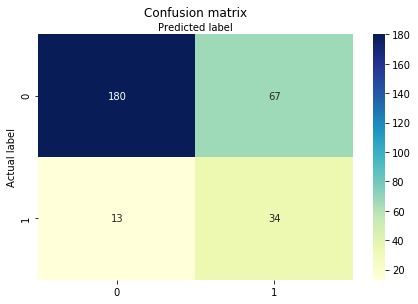

In [222]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [223]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 72.79


In [224]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       247
           1       0.34      0.72      0.46        47

    accuracy                           0.73       294
   macro avg       0.63      0.73      0.64       294
weighted avg       0.84      0.73      0.76       294



In [225]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.789


In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

In [ ]:
df_param_coeff

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

In [ ]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [99]:
## Import Library ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For Data Encoding ##
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## For Model Evaluation ##
from sklearn.model_selection import KFold

## Machine Learning Model ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import time
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts


from sklearn.utils import shuffle
#X_train, y_train = shuffle(X, y, random_state=119)#

from sklearn.preprocessing import StandardScaler


## For Model Performance ##
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [100]:
## Model Performance
def evaluation(gt, pred):
    acc = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred)
    f1 = f1_score(gt, pred)
    matrix = confusion_matrix(gt, pred)
    
    return acc, precision, recall, f1, matrix

In [87]:
def getOne_hot_encoding_df(raw_data):
    categorical_col = []
    numeric_col = []
    for col in raw_data.columns:
        #print("col=",col,"raw_data[col].dtype=",raw_data[col].dtype)
        if col != "Attrition" :
            if raw_data[col].dtype == object :
                categorical_col.append(col)
                #print("categorical_col",col, raw_data[col].unique())
                #print("========================================================================")
            else: 
                #if raw_data[col].dtype == int :
                numeric_col.append(col)
                #print("numeric_col",col, raw_data[col].unique())
                #print("========================================================================")
    raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
    raw_data["Attrition"].value_counts()
    #one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)
    
    return pd.get_dummies(raw_data, columns=categorical_col)

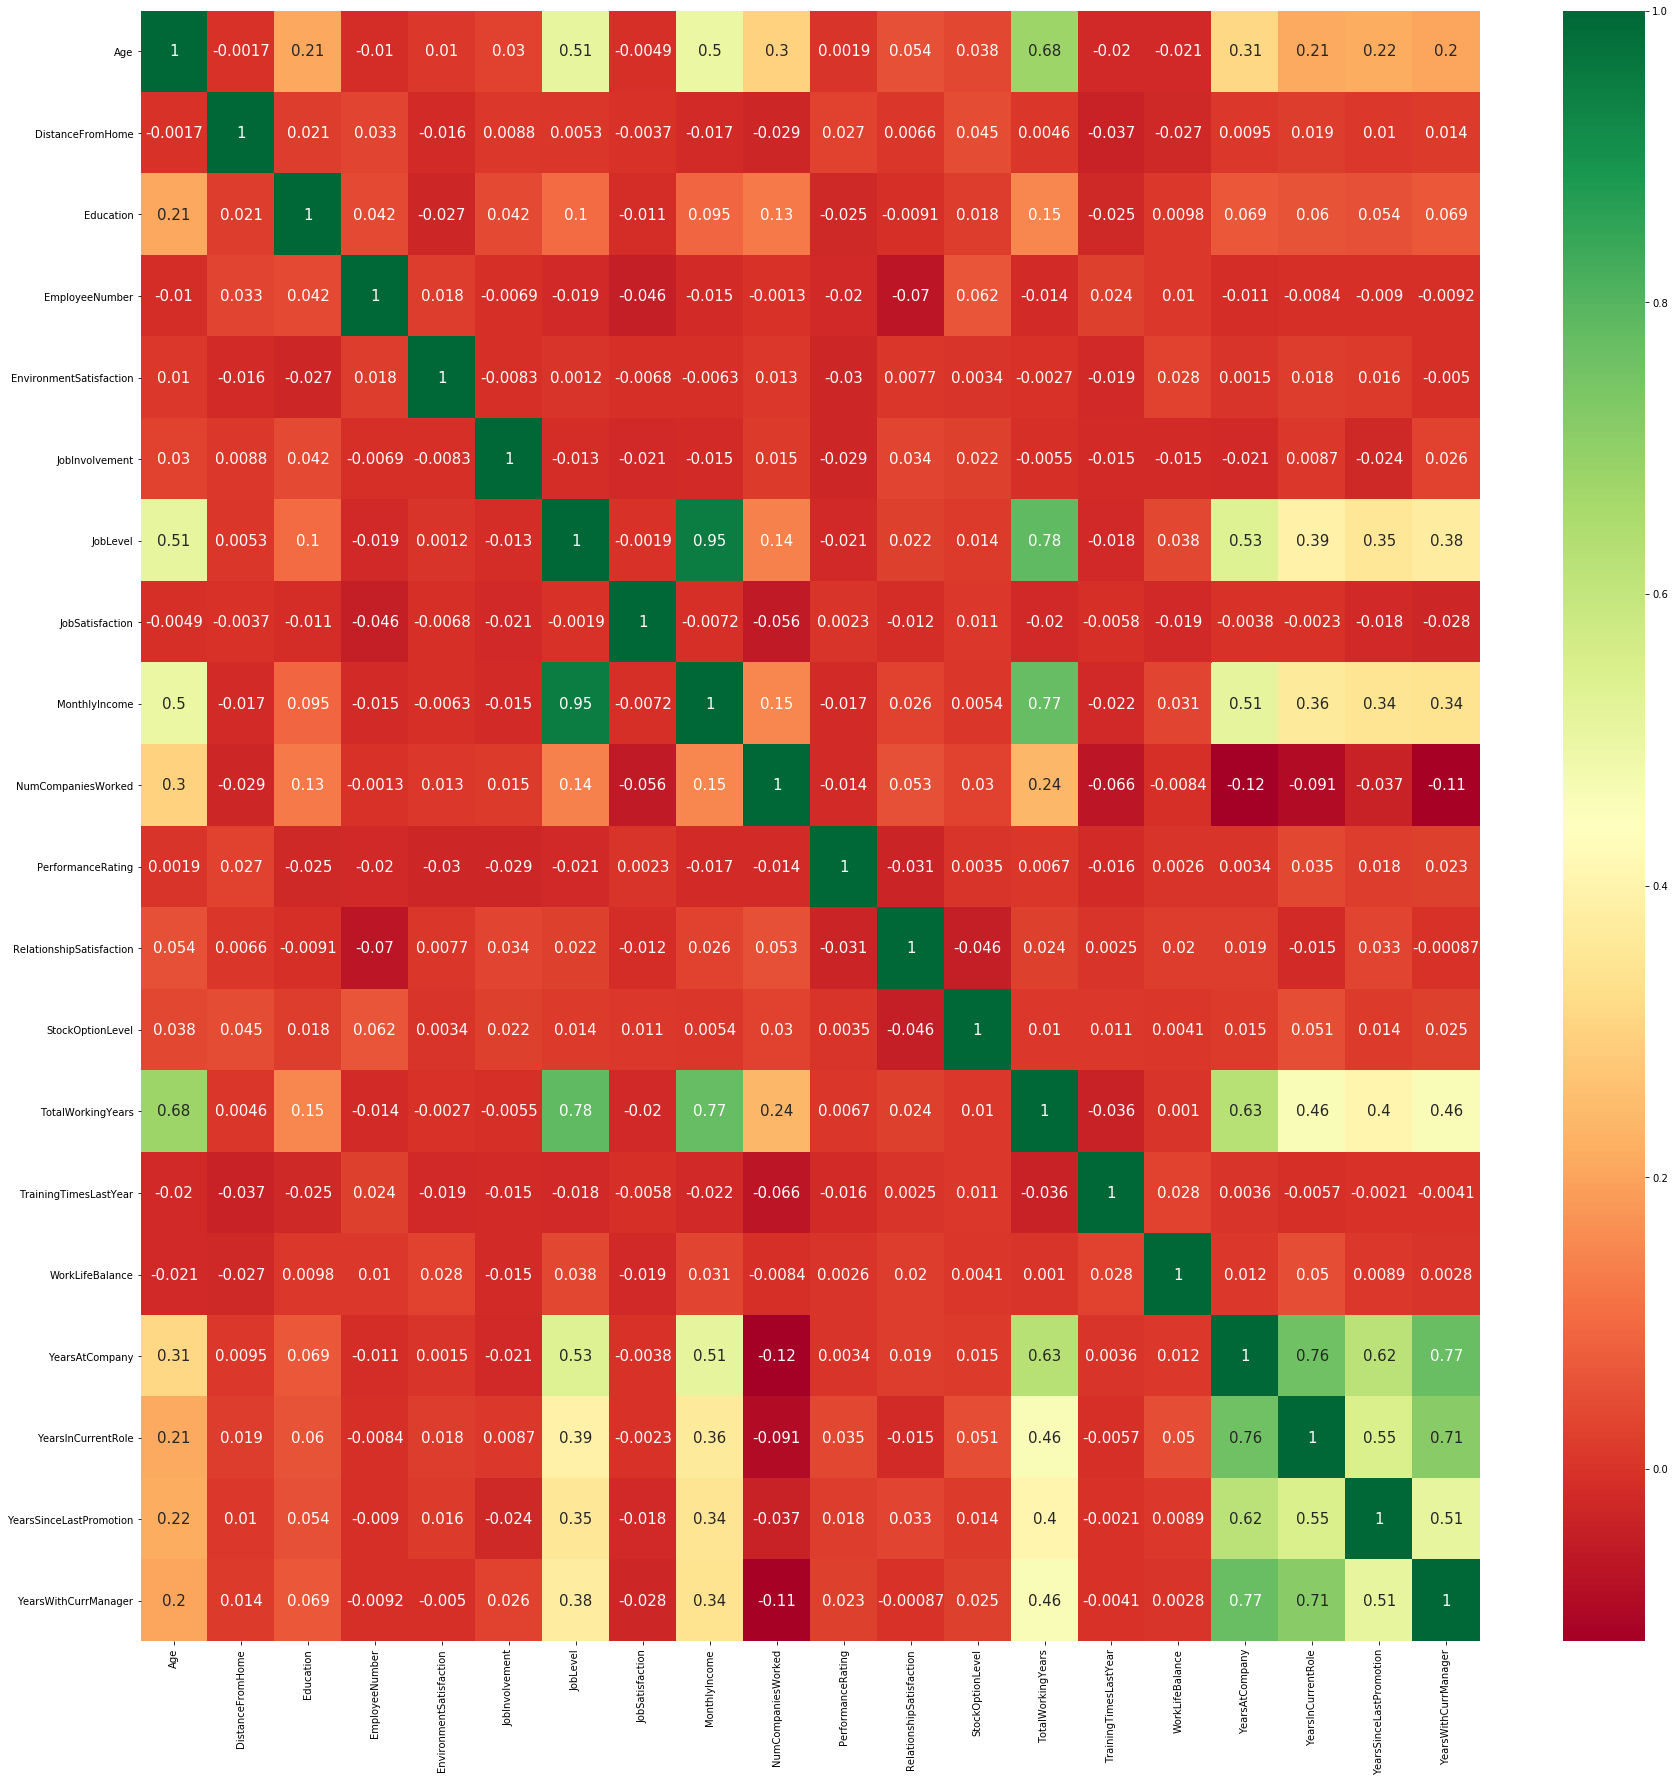

In [101]:
raw_data_train = pd.read_csv("./fold/EmployeeAttrition.csv")
raw_data_train = raw_data_train.drop([raw_data_train.columns[0]],axis=1)
plt.figure(figsize=(30, 30))
sns.heatmap(raw_data_train.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

0 fold_0_train.csv fold_0_test.csv
Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.857000, Precision: 0.727000, Recall: 0.170000, F1: 0.276000
1 fold_1_train.csv fold_1_test.csv
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.881000, Precision: 0.900000, Recall: 0.209000, F1: 0.340000
2 fold_2_train.csv fold_2_test.csv
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.833000, Precision: 0.812000, Recall: 0.220000, F1: 0.347000
3 fold_3_train.csv fold_3_test.csv
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.881000, Precision: 0.857000, Recall: 0.267000, F1: 0.407000
4 fold_4_train.csv fold_4_test.csv
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.881000, Precision: 0.786000, Recall: 0.256000, F1: 0.386000
Avg Accuracy: 0.867000, Avg Precision: 0.817000, Avg Recall: 0.224000, Avg F1: 0.351000


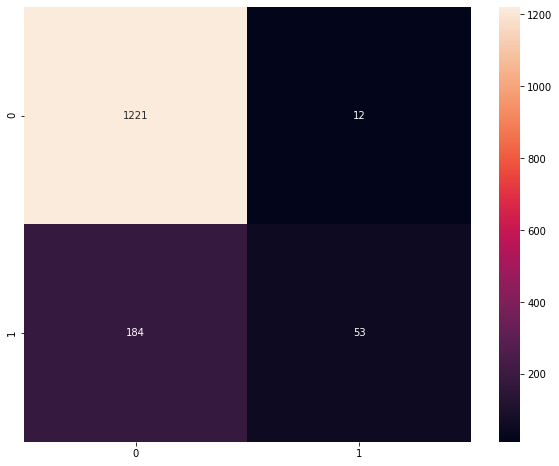

In [300]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []
kf = KFold(n_splits=5)

fold_count = 0

for i in range(5):
      
    filename1 = "fold_"+str(i)+"_train.csv"
    filename2 = "fold_"+str(i)+"_test.csv"
    print(i,filename1,filename2)
    
    raw_data_train = pd.read_csv("./fold/fold_"+str(i)+"_train.csv")
    #raw_data_train = raw_data_train.drop([raw_data_train.columns[0]],axis=1)
    raw_data_train = raw_data_train.drop([raw_data_train.columns[0],
                        'DistanceFromHome',
                        'PerformanceRating',
                        'NumCompaniesWorked',
                        'EmployeeNumber'
                                          
                        ],axis=1)
    #print ("\nMissing values :  ", raw_data_train.isnull().sum().values.sum())
    
    one_hot_encoding_df_train = getOne_hot_encoding_df(raw_data_train) 
  
    raw_data_test = pd.read_csv("./fold/fold_"+str(i)+"_test.csv")
    #raw_data_test = raw_data_test.drop([raw_data_test.columns[0]],axis=1)
    raw_data_test = raw_data_test.drop([raw_data_test.columns[0],
                        'DistanceFromHome',
                        'PerformanceRating',
                        'NumCompaniesWorked',
                        'EmployeeNumber'
                        ],axis=1)
    #print ("\nMissing values :  ", raw_data_test.isnull().sum().values.sum())
    
    one_hot_encoding_df_test = getOne_hot_encoding_df(raw_data_test)
    
    ##One hot encoding 處理
    train_X = one_hot_encoding_df_train.drop(['Attrition'],axis=1)
    train_y = one_hot_encoding_df_train['Attrition']
    test_X = one_hot_encoding_df_test.drop(['Attrition'],axis=1)
    test_y = one_hot_encoding_df_test['Attrition']  
    #print(train_y)
    print("Training Data: %d, Testing Data: %d" % (len(raw_data_train), len(raw_data_test)))
     
    ##資料預處理 ：資料標準化
    #PP = preprocessing.StandardScaler()
    PP = preprocessing.MinMaxScaler()
    #PP = preprocessing.MaxAbsScaler()
    #PP = preprocessing.RobustScaler()
    train_X = PP.fit_transform(train_X)
    test_X = PP.fit_transform(test_X)
       
    normalizer = Normalizer(copy=True, norm='l2').fit(train_X)
    train_X =normalizer.transform(train_X)
    normalizer = Normalizer(copy=True, norm='l2').fit(test_X)
    test_X =normalizer.transform(test_X)
  
    ### Data Splitting and Model Learning (Decision Tree)
    #model = DecisionTreeClassifier(random_state=200)#random_state=23,criterion='entropy' 'gini'
    #model = DecisionTreeClassifier(random_state=23,criterion='entropy')
   
    #tree = DecisionTreeClassifier(random_state=23,criterion='entropy')
    #tree = RandomForestClassifier(n_estimators=300)
    #tree = LogisticRegression(solver='newton-cg')
    #tree = svm.SVC()
    #tree = DecisionTreeClassifier()
    #通過每個估計器擬合80％的訓練點
    #model = BaggingClassifier(tree, n_estimators=3000, max_samples=0.80, random_state=119)
    
    #model = RandomForestClassifier(n_estimators=3000,max_features='auto')
    #model = RandomForestClassifier(n_estimators=2000, oob_score = True, n_jobs = -1,random_state =119,
    #                            max_features = "auto", min_samples_leaf = 5)#max_features='log2',
    
    model = RandomForestClassifier(n_estimators=1000, oob_score = True, n_jobs = -1,random_state =119,max_depth=50, max_features = "log2")
    #model = LogisticRegression(solver='liblinear')
    #model = LogisticRegression(solver='newton-cg')#{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} 有各種演算法可以選擇
    
    #model = svm.SVC(C=200,kernel='rbf',gamma='auto')
    #model = svm.SVC(kernel='linear')#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’#
    #model = svm.SVC()
    
    model.fit(train_X, train_y)
    test_predict = model.predict(test_X)

    #aa=avg_feature_importance.append(model.feature_importances_)
    #print("feature_importances=",aa)

    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1 , round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1
print("=================================================================================")

print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                               round(avg_precision / kf.get_n_splits(), 3), \
                                                                               round(avg_recall / kf.get_n_splits(), 3), \
                                                                               round(avg_f1 / kf.get_n_splits(), 3)))
    
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

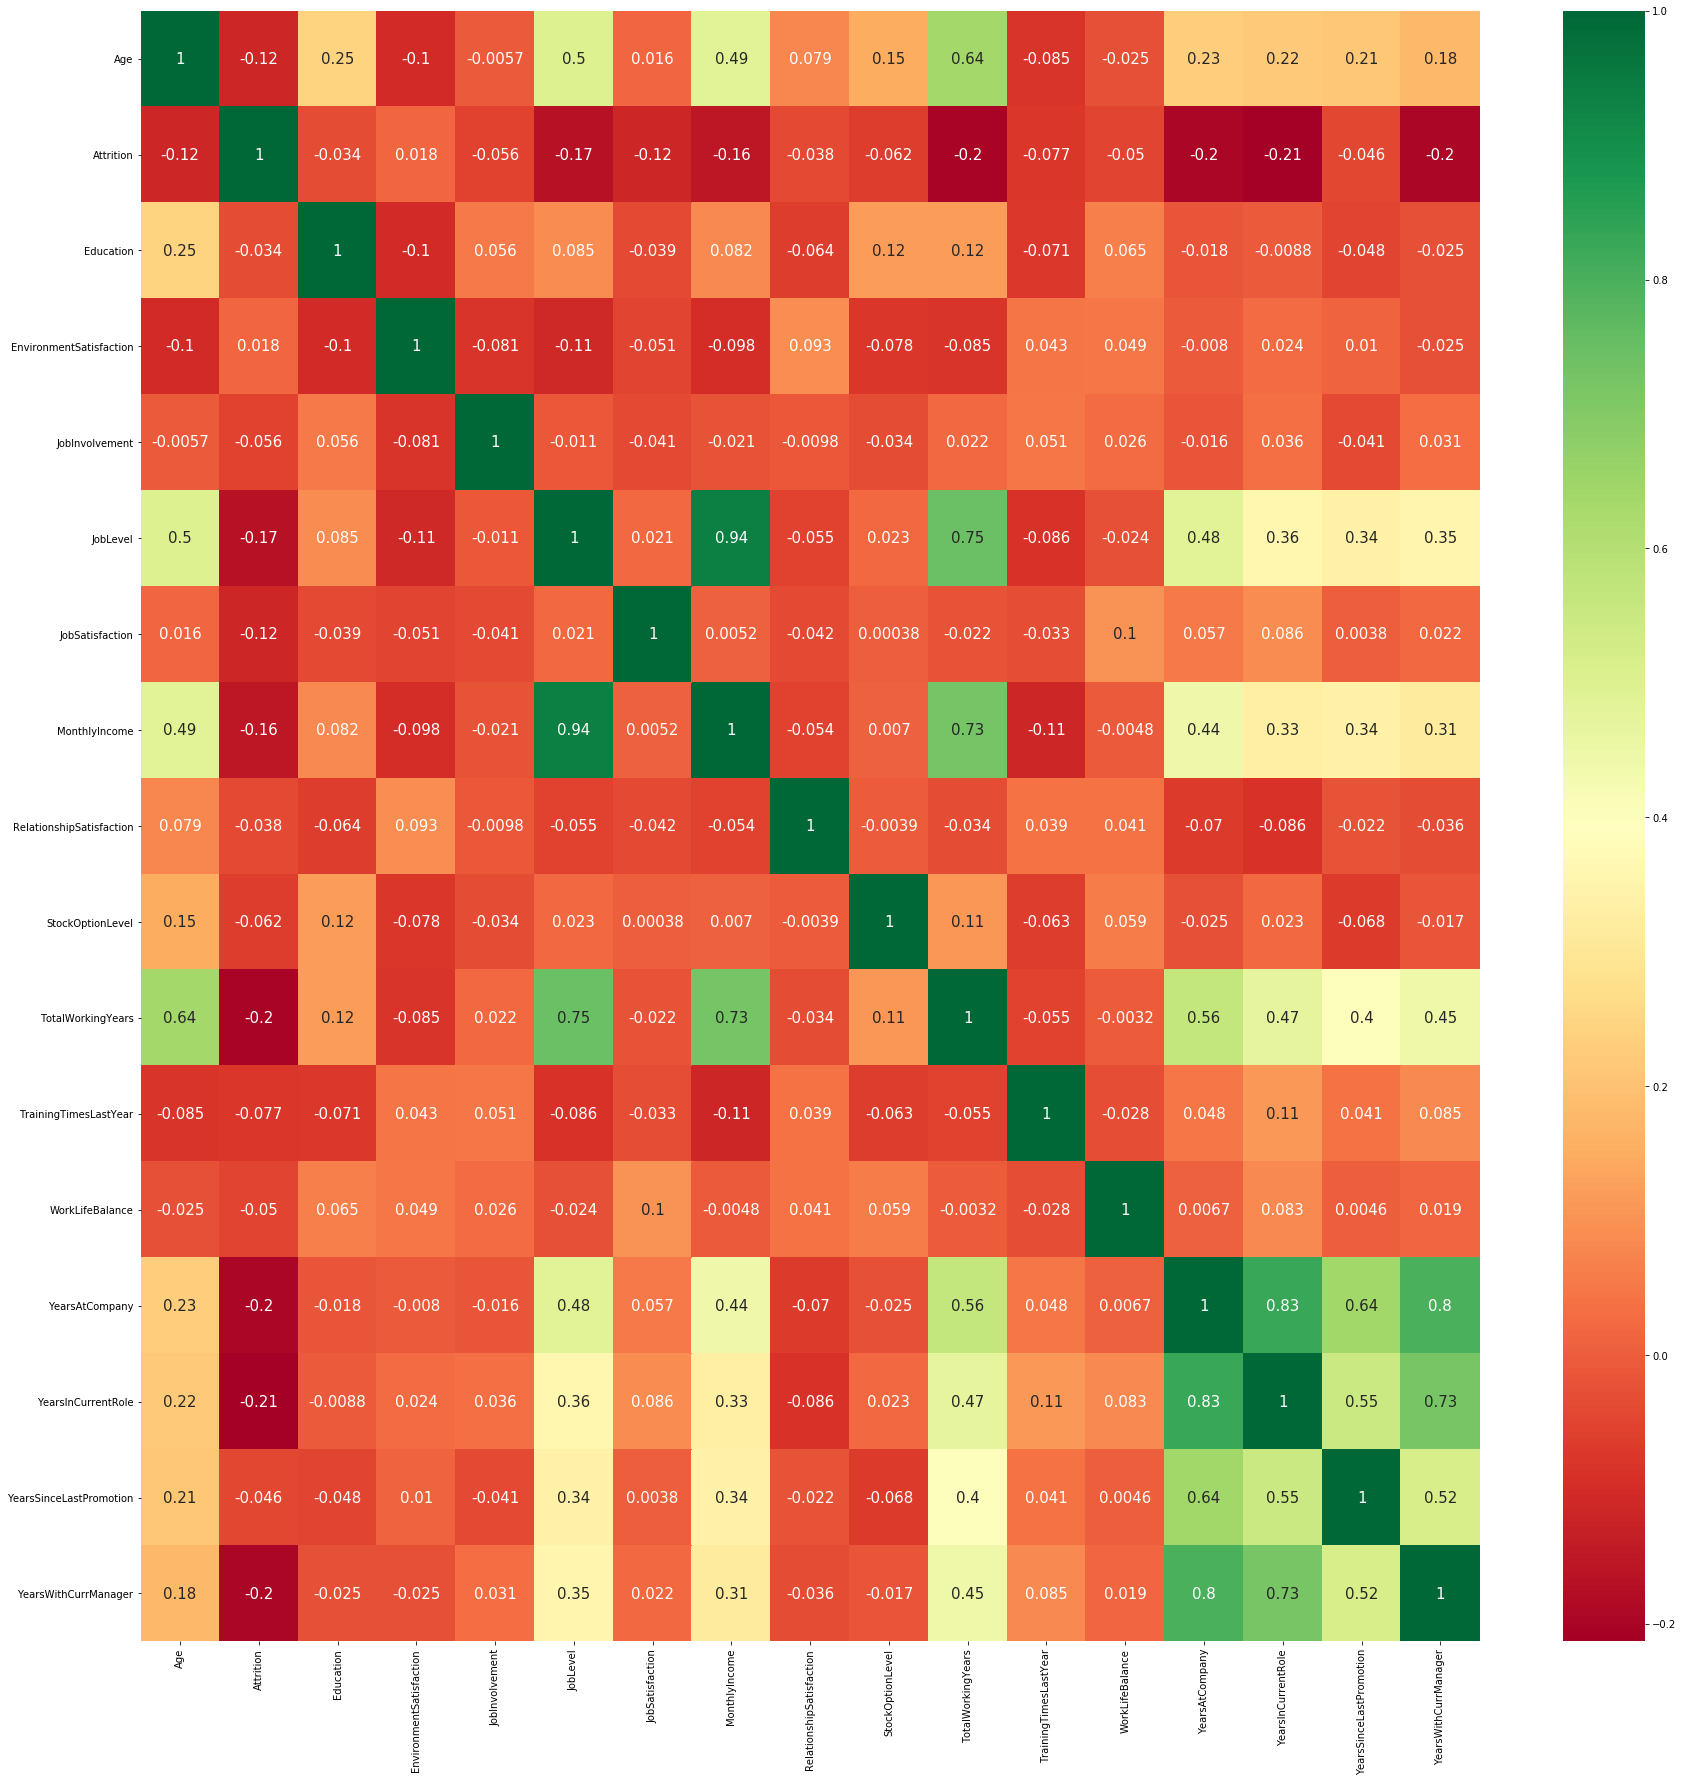

In [228]:
plt.figure(figsize=(30, 30))
sns.heatmap(raw_data_test.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [229]:
#raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=1)
raw_data = pd.read_csv("./fold/EmployeeAttrition.csv")
#raw_data['Attrition'].replace({'Yes':1, 'No':0}, inplace=True)

In [230]:
raw_data

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,3,3,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,3,1,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,4,2,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,3,4,0,17,3,2,9,6,0,8


In [231]:
display(raw_data.isnull().any())

Unnamed: 0                  False
Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [232]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [233]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
#from imblearn.over_sampling import SMOTE

In [235]:
attrition=raw_data

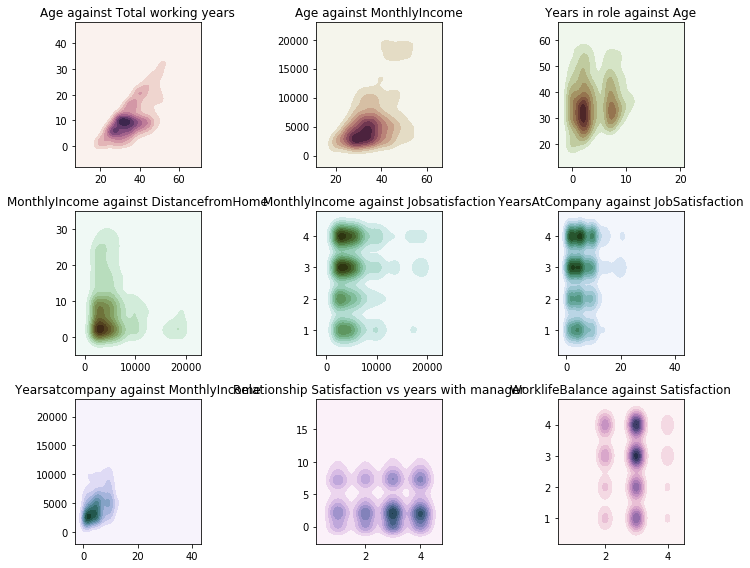

In [236]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['MonthlyIncome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against MonthlyIncome')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')


cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['MonthlyIncome'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'MonthlyIncome against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['MonthlyIncome'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'MonthlyIncome against Jobsatisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'YearsAtCompany against JobSatisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['MonthlyIncome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Yearsatcompany against MonthlyIncome')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [237]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [238]:
print(attrition["Attrition_numerical"])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_numerical, Length: 1470, dtype: int64


In [240]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [241]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [242]:
numerical

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'Unnamed: 0',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [243]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [244]:
attrition_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [245]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [246]:
# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

In [247]:
attrition_num

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Unnamed: 0,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,3,2,4,5993,8,3,1,0,8,0,0,1,6,4,0,5
1,49,8,1,2,3,2,2,2,5130,1,4,4,1,10,3,1,3,10,7,1,7
2,37,2,2,4,4,2,1,3,2090,6,3,2,0,7,3,2,3,0,0,0,0
3,33,3,4,5,4,3,1,3,2909,1,3,3,0,8,3,3,3,8,7,3,0
4,27,2,1,7,1,3,1,2,3468,9,3,4,1,6,3,4,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,2061,3,4,2,4,2571,4,3,3,1,17,3,1465,3,5,2,0,3
1466,39,6,1,2062,4,2,3,1,9991,4,3,1,1,9,5,1466,3,7,7,1,7
1467,27,4,3,2064,2,4,2,2,6142,1,4,2,1,6,0,1467,3,6,2,0,3
1468,49,2,3,2065,4,2,2,2,5390,2,3,4,0,17,3,1468,2,9,6,0,8


In [248]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [249]:
attrition_final

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Unnamed: 0,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1,2,3,2,4,5993,8,3,1,0,8,0,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,8,1,2,3,2,2,2,5130,1,4,4,1,10,3,1,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,2,2,4,4,2,1,3,2090,6,3,2,0,7,3,2,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,3,4,5,4,3,1,3,2909,1,3,3,0,8,3,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,2,1,7,1,3,1,2,3468,9,3,4,1,6,3,4,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,2061,3,4,2,4,2571,4,3,3,1,17,3,1465,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,6,1,2062,4,2,3,1,9991,4,3,1,1,9,5,1466,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,4,3,2064,2,4,2,2,6142,1,4,2,1,6,0,1467,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,2,3,2065,4,2,2,2,5390,2,3,4,0,17,3,1468,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [250]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [251]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

In [256]:
categorical_col = []
numeric_col = []
for col in raw_data.columns:
    print("col=",col,"raw_data[col].dtype=",raw_data[col].dtype)
    if col != "Attrition" :
        if raw_data[col].dtype == object :
            categorical_col.append(col)
            print("categorical_col",col, raw_data[col].unique())
            print("========================================================================")
        else: 
            #if raw_data[col].dtype == int :
            numeric_col.append(col)
            print("numeric_col",col, raw_data[col].unique())
            print("========================================================================")

col= Unnamed: 0 raw_data[col].dtype= int64
numeric_col Unnamed: 0 [   0    1    2 ... 1467 1468 1469]
col= Age raw_data[col].dtype= int64
numeric_col Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
col= Attrition raw_data[col].dtype= object
col= BusinessTravel raw_data[col].dtype= object
categorical_col BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
col= Department raw_data[col].dtype= object
categorical_col Department ['Sales' 'Research & Development' 'Human Resources']
col= DistanceFromHome raw_data[col].dtype= int64
numeric_col DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
col= Education raw_data[col].dtype= int64
numeric_col Education [2 1 4 3 5]
col= EducationField raw_data[col].dtype= object
categorical_col EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
col= Emp

In [ ]:
categorical_col

In [ ]:
numeric_col

In [257]:
## Encode Label
raw_data["Attrition"] = raw_data["Attrition"].astype("category").cat.codes
raw_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

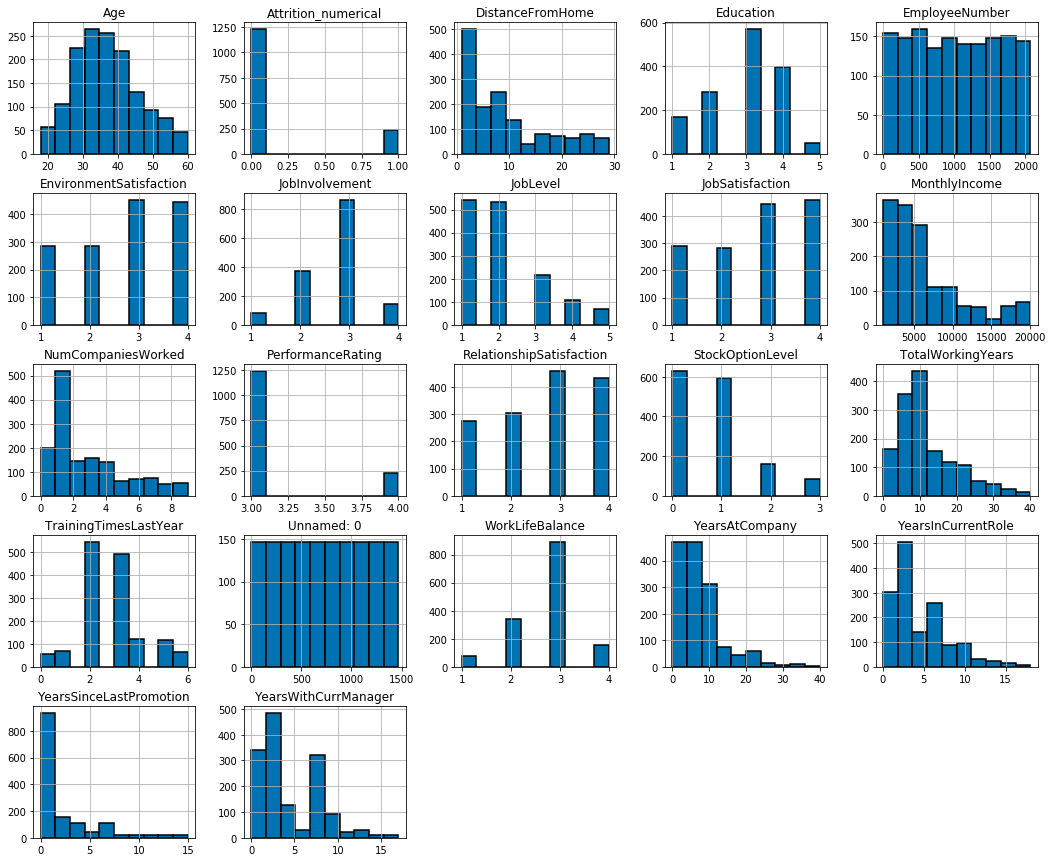

In [258]:
## Data Visualization for numerical data
raw_data[numeric_col].hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
plt.show()

In [259]:
X = np.array(raw_data["TotalWorkingYears"]).reshape(len(raw_data), 1)
y = np.array(raw_data["MonthlyIncome"])
model = LinearRegression()
model = model.fit(X, y)
pred = model.predict(X)
print("y = %f * X + %f" % (model.coef_[0], model.intercept_))
print(pred)

y = 467.658412 * X + 1227.935288
[4969.20258264 5904.51940633 4501.54417079 ... 4033.88575894 9178.12828928
 4033.88575894]


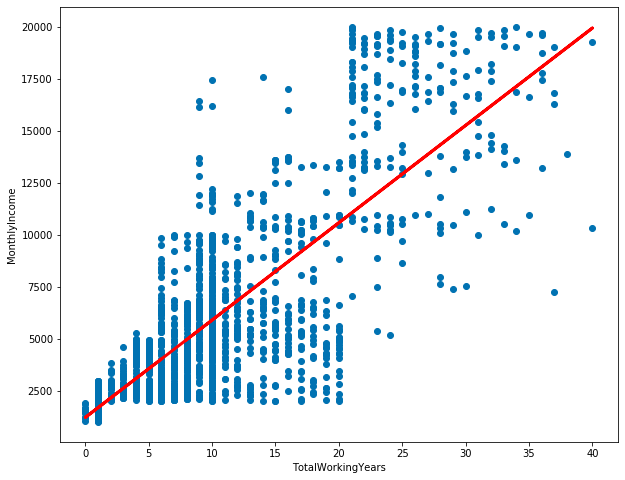

In [260]:
plt.figure(figsize=(10, 8))
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.plot(raw_data["TotalWorkingYears"], pred, color="red", linewidth = 3)
plt.xlabel("TotalWorkingYears")
plt.ylabel("MonthlyIncome")
plt.show()

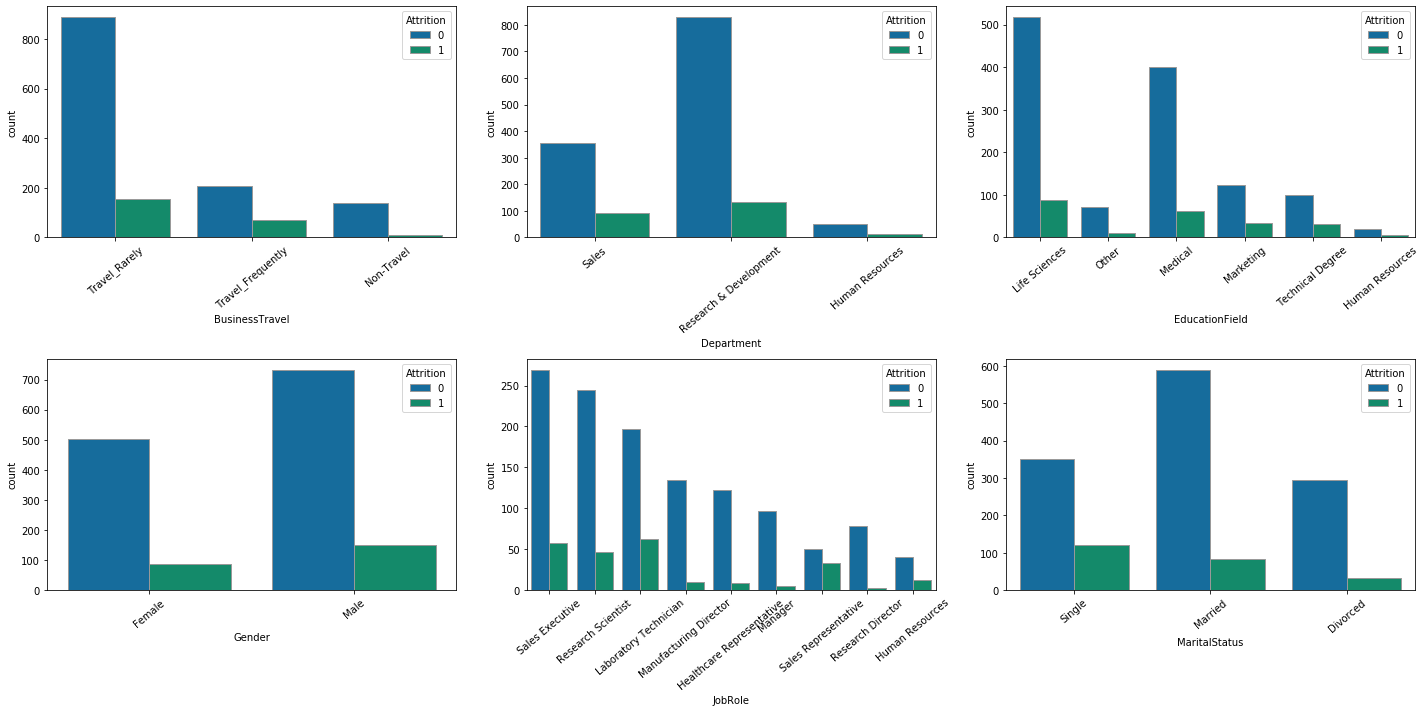

In [261]:
## Data Visualization for categorical data
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(categorical_col):
    row_num = int(index / 3)
    col_num = (index % 3)
    label = list(raw_data[col].unique())
    sns.countplot(x=str(col), hue="Attrition", edgecolor=".6", data=raw_data, ax = axes[row_num, col_num])
    axes[row_num, col_num].set_xticklabels(label, rotation=40)
plt.tight_layout()
plt.show()

In [262]:
## Data Encoding (one-hot encoding)
one_hot_encoding_df = pd.get_dummies(raw_data, columns=categorical_col)

In [263]:
one_hot_encoding_df

,Unnamed: 0,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,2,1,2,3,2,4,5993,8,3,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,8,1,2,3,2,2,2,5130,1,4,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,2,2,4,4,2,1,3,2090,6,3,2,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,3,4,5,4,3,1,3,2909,1,3,3,0,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,2,1,7,1,3,1,2,3468,9,3,4,1,6,3,3,2,2,2,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,23,2,2061,3,4,2,4,2571,4,3,3,1,17,3,3,5,2,0,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,1466,39,0,6,1,2062,4,2,3,1,9991,4,3,1,1,9,5,3,7,7,1,7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,1467,27,0,4,3,2064,2,4,2,2,6142,1,4,2,1,6,0,3,6,2,0,3,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,1468,49,0,2,3,2065,4,2,2,2,5390,2,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [264]:
one_hot_encoding_df.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numerical',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human 

In [265]:
one_hot_encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   Attrition                          1470 non-null   int8 
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PerformanceRating   

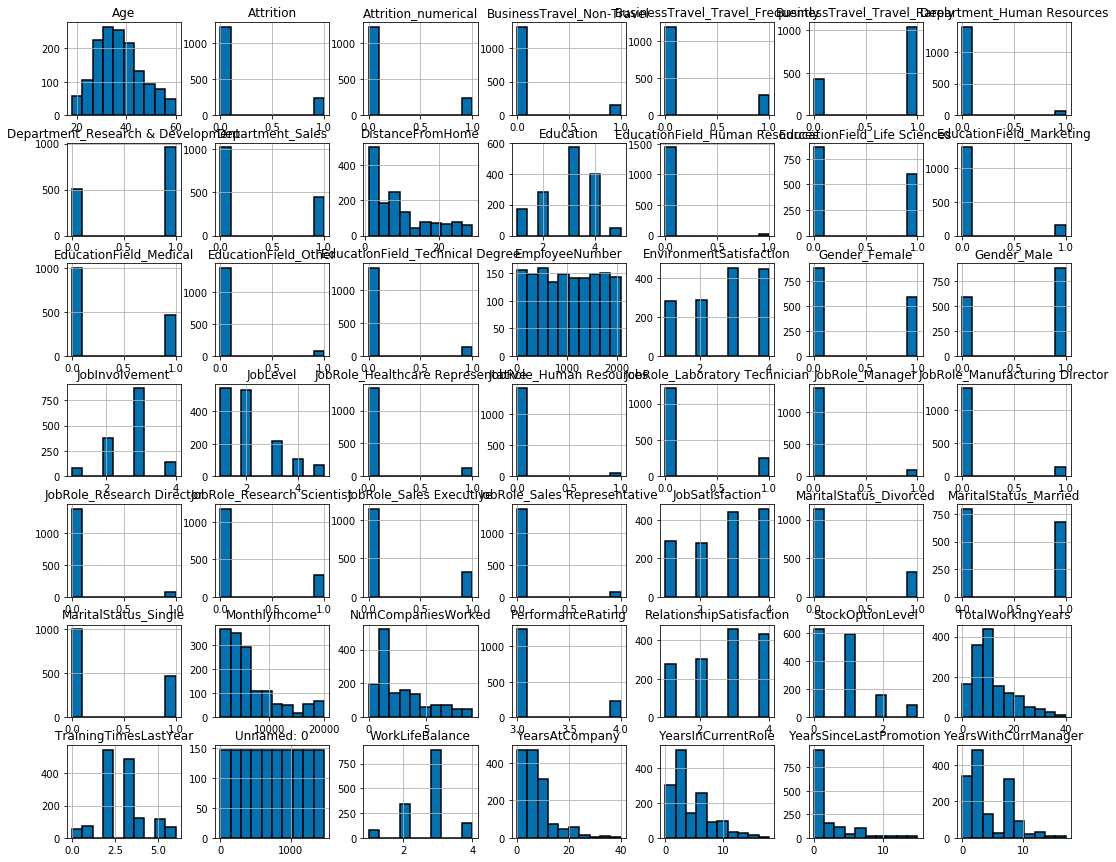

In [266]:
one_hot_encoding_df.hist(edgecolor='black', linewidth=1.5, figsize=(18, 15))
#one_hot_encoding_df[numeric_col]#
plt.show()

In [267]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [268]:
set(one_hot_encoding_df.columns) - set(numeric_col)

{'Attrition',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single'}

In [269]:
one_hot_encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   Attrition                          1470 non-null   int8 
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PerformanceRating   

In [270]:
## Data Splitting and Model Learning (Decision Tree)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

from sklearn.preprocessing import Normalizer

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
    
    #sc.fit(train_X)
    #train_X = sc.transform(train_X)

    #sc.fit(test_X)
    #test_X = sc.transform(test_X)

   
    #ormalizer = Normalizer().fit(train_X)
    #rain_X =normalizer.transform(train_X)
    #ormalizer = Normalizer().fit(test_X)
    #est_X =normalizer.transform(test_X)


    model = DecisionTreeClassifier(random_state=200)
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Avg Accuracy: 1.000000, Avg Precision: 1.000000, Avg Recall: 1.000000, Avg F1: 1.000000


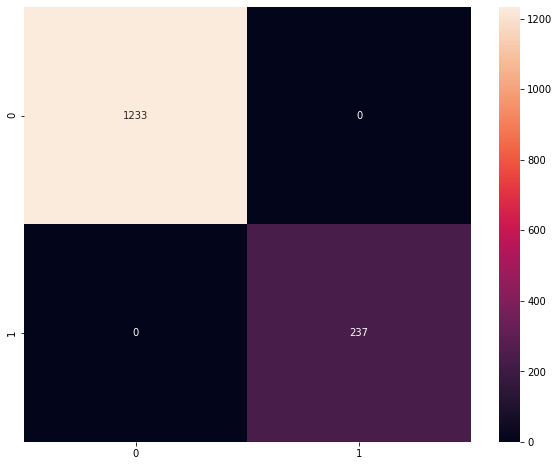

In [271]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [272]:
importance_dict = {}
for col, importance in zip(train_X.columns, np.mean(np.array(avg_feature_importance), axis=0)):
    importance_dict[col] = importance

sorted(importance_dict.items(), key=lambda x: -x[1])[:10]

[('Attrition_numerical', 1.0),
 ('Unnamed: 0', 0.0),
 ('Age', 0.0),
 ('DistanceFromHome', 0.0),
 ('Education', 0.0),
 ('EmployeeNumber', 0.0),
 ('EnvironmentSatisfaction', 0.0),
 ('JobInvolvement', 0.0),
 ('JobLevel', 0.0),
 ('JobSatisfaction', 0.0)]

In [273]:
## Data Splitting and Model Learning (Random Forest)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

from sklearn.preprocessing import Normalizer


avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_confusion_matrix = []
avg_feature_importance = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]

    train_X, train_y = shuffle(train_X, train_y, random_state=119)
    
    #sc.fit(train_X)
    #train_X = sc.transform(train_X)
    
    #sc.fit(test_X)
    #test_X = sc.transform(test_X)

    
    #normalizer = Normalizer().fit(train_X)
    #train_X =normalizer.transform(train_X)

    #normalizer = Normalizer().fit(test_X)
    #test_X =normalizer.transform(test_X)
   
        
        
    model = RandomForestClassifier(n_estimators=300)
    #model = svm.SVC(C=200,kernel='rbf',gamma='auto')
    #model = svm.SVC(kernel='linear',gamma='auto')
    #model = svm.SVC()
    
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    #avg_feature_importance.append(model.feature_importances_)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 1.000000, Precision: 1.000000, Recall: 1.000000, F1: 1.000000
Avg Accuracy: 1.000000, Avg Precision: 1.000000, Avg Recall: 1.000000, Avg F1: 1.000000


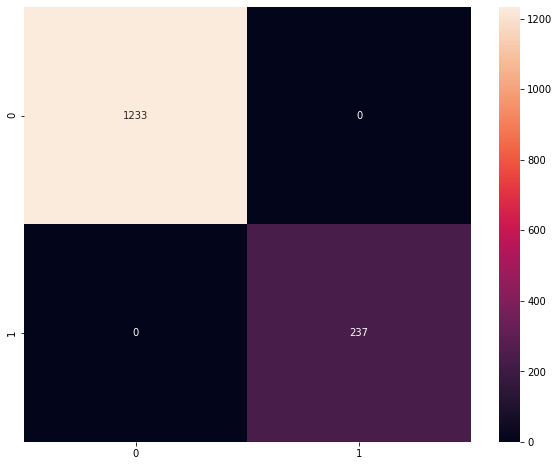

In [274]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()

In [275]:

raw_data_train = pd.read_csv("./fold/fold_0_train.csv")
raw_data_train 
#one_hot_encoding_df_train = pd.get_dummies(raw_data_train, columns=categorical_col)


,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,294,37,No,Travel_Frequently,Research & Development,9,3,Medical,403,2,Male,3,1,Research Scientist,4,Married,2326,1,3,3,3,4,3,2,4,2,1,2
1,295,42,No,Travel_Frequently,Sales,26,3,Marketing,404,3,Female,3,4,Sales Executive,2,Married,13525,5,3,4,1,23,2,4,20,4,4,8
2,296,18,Yes,Travel_Rarely,Research & Development,3,3,Life Sciences,405,3,Male,3,1,Laboratory Technician,3,Single,1420,1,3,3,0,0,2,3,0,0,0,0
3,297,35,No,Travel_Rarely,Sales,16,3,Marketing,406,3,Male,3,3,Sales Executive,2,Married,8020,0,3,3,2,12,3,2,11,9,6,9
4,298,36,No,Travel_Frequently,Research & Development,18,4,Life Sciences,407,3,Male,4,1,Laboratory Technician,4,Married,3688,4,3,4,2,4,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,3,3,1,17,3,3,5,2,0,3
1172,1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,3,1,1,9,5,3,7,7,1,7
1173,1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,4,2,1,6,0,3,6,2,0,3
1174,1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,3,4,0,17,3,2,9,6,0,8


In [276]:
raw_data_train.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [277]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  JobInvolvement            1176 non-null   int64 
 12  JobLevel                  1176 non-null   int64 
 13  JobRole                   1176 non-null   object
 14  JobSatisfaction         

In [278]:


raw_data_train=raw_data_train.drop(raw_data_train.columns[0],axis=1)


categorical_col = []
numeric_col = []
for col in raw_data_train.columns:
    print("col=",col,"raw_data[col].dtype=",raw_data_train[col].dtype)
    if col != "Attrition" :
        if raw_data_train[col].dtype == object :
            categorical_col.append(col)
            print("categorical_col",col, raw_data_train[col].unique())
            print("========================================================================")
        else: 
            #if raw_data[col].dtype == int :
            numeric_col.append(col)
            print("numeric_col",col, raw_data_train[col].unique())
            print("========================================================================")










#one_hot_encoding_df_train = pd.get_dummies(raw_data_train, columns=categorical_col)


col= Age raw_data[col].dtype= int64
numeric_col Age [37 42 18 35 36 51 41 28 31 39 32 38 58 45 33 43 49 52 27 30 47 54 40 29
 23 48 26 21 57 46 50 34 55 24 22 25 56 60 19 20 44 53 59]
col= Attrition raw_data[col].dtype= object
col= BusinessTravel raw_data[col].dtype= object
categorical_col BusinessTravel ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
col= Department raw_data[col].dtype= object
categorical_col Department ['Research & Development' 'Sales' 'Human Resources']
col= DistanceFromHome raw_data[col].dtype= int64
numeric_col DistanceFromHome [ 9 26  3 16 18  2 10  7  1 24 25  5  8 28 20 15  6  4 23 29 22 12 14 19
 11 21 17 13 27]
col= Education raw_data[col].dtype= int64
numeric_col Education [3 4 2 1 5]
col= EducationField raw_data[col].dtype= object
categorical_col EducationField ['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
col= EmployeeNumber raw_data[col].dtype= int64
numeric_col EmployeeNumber [ 403  404  405 ... 2064 2065 2068]


In [279]:
raw_data_train["Attrition"] = raw_data_train["Attrition"].astype("category").cat.codes
raw_data_train["Attrition"].value_counts()

0    986
1    190
Name: Attrition, dtype: int64

In [280]:
one_hot_encoding_df_train = pd.get_dummies(raw_data_train, columns=categorical_col)

In [ ]:
one_hot_encoding_df_train

In [ ]:
set(one_hot_encoding_df_train.columns) - set(numeric_col)

In [ ]:
one_hot_encoding_df_train

In [284]:
## Data Splitting and Model Learning (Logistic Regression)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

from sklearn.preprocessing import Normalizer

avg_acc = 0
avg_precision = 0
avg_recall = 0
avg_f1 = 0
avg_feature_importance = []
avg_confusion_matrix = []

kf = KFold(n_splits=5)
fold_count = 0
for train_index, test_index in kf.split(one_hot_encoding_df):
    print(fold_count,kf.get_n_splits())
    print("Training Data: %d, Testing Data: %d" % (len(train_index), len(test_index)))
    train_X = one_hot_encoding_df.loc[train_index, one_hot_encoding_df.columns != 'Attrition']
    train_y = one_hot_encoding_df.loc[train_index]["Attrition"]
    test_X = one_hot_encoding_df.loc[test_index, one_hot_encoding_df.columns != 'Attrition']
    test_y = one_hot_encoding_df.loc[test_index]["Attrition"]
 
    #sc.fit(train_X)
    #train_X = sc.transform(train_X)
    #sc.fit(test_X)
    #test_X = sc.transform(test_X)

    
    normalizer = Normalizer().fit(train_X)
    train_X =normalizer.transform(train_X)

    normalizer = Normalizer().fit(test_X)
    test_X =normalizer.transform(test_X)    



    model = LogisticRegression(solver='liblinear')
    model = model.fit(train_X, train_y)
    test_predict = model.predict(test_X)
    
    acc, precision, recall, f1, matrix = evaluation(test_y, test_predict)
    print("Fold: %d, Accuracy: %f, Precision: %f, Recall: %f, F1: %f" % (fold_count + 1, round(acc, 3), round(precision, 3), round(recall, 3), round(f1, 3)))
    avg_acc += acc
    avg_precision += precision
    avg_recall += recall
    avg_f1 += f1
    avg_confusion_matrix.append(matrix)
    fold_count += 1

print("=================================================================================")
print("Avg Accuracy: %f, Avg Precision: %f, Avg Recall: %f, Avg F1: %f" % (round(avg_acc / kf.get_n_splits(), 3), \
                                                                           round(avg_precision / kf.get_n_splits(), 3), \
                                                                           round(avg_recall / kf.get_n_splits(), 3), \
                                                                           round(avg_f1 / kf.get_n_splits(), 3)))

0 5
Training Data: 1176, Testing Data: 294
Fold: 1, Accuracy: 0.840000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
1 5
Training Data: 1176, Testing Data: 294
Fold: 2, Accuracy: 0.854000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
2 5
Training Data: 1176, Testing Data: 294
Fold: 3, Accuracy: 0.799000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
3 5
Training Data: 1176, Testing Data: 294
Fold: 4, Accuracy: 0.847000, Precision: 0.000000, Recall: 0.000000, F1: 0.000000
4 5
Training Data: 1176, Testing Data: 294
Fold: 5, Accuracy: 0.857000, Precision: 0.667000, Recall: 0.047000, F1: 0.087000
Avg Accuracy: 0.839000, Avg Precision: 0.133000, Avg Recall: 0.009000, Avg F1: 0.017000


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.sum(np.array(avg_confusion_matrix), axis=0), annot=True, fmt="d")
plt.show()